In [12]:

# Initial Imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [13]:

#df = pd.read_csv(
   # Path("WEOApr2021all.csv"), parse_dates=True
#)

#df = pd.read_csv(
    #Path("GDP.csv"),
    #index_col="DATE",
    #infer_datetime_format=True,
   # parse_dates=True,
#)
#df.tail()
#set date as index 
#create lagged column for next quarters gdp


df = pd.read_csv(
    Path("WEOApril2021all.csv")
)

df = df[(df["Subject Descriptor"]=="Inflation, average consumer prices") & (df["Units"]=="Percent change")]
df.drop(columns=["Subject Descriptor", "Units", "Scale", "Estimates Start After"], inplace=True)
df = df.T
df.columns = df.loc["Country"]
df = df.drop("Country", axis=0)
df.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
WEO Country Code,512,914,612,614,311,213,911,314,193,122,...,111,298,927,846,299,582,487,474,754,698
ISO,AFG,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,...,USA,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
WEO Subject Code,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,...,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH
Subject Notes,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...
Country/Series-specific Notes,"See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...",...,"See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr..."


In [18]:
India_df = df[['India']]

India_Inflation = US_df.drop(labels=["WEO Country Code", "ISO", "WEO Subject Code", "Subject Notes", "Country/Series-specific Notes"], axis=0)

India_Inflation.rename(columns = {'Country':'Year'}, inplace = True)

#df = df.replace(",","", regex=True)
#df = df.astype("float")
#df


India_Inflation = India_Inflation.replace(",","", regex=True)
India_Inflation = India_Inflation.astype("float")
India_Inflation

Country,India
1980,11.346
1981,12.654
1982,7.736
1983,12.558
1984,6.517
1985,6.251
1986,8.889
1987,9.059
1988,7.214
1989,4.569


In [19]:
def window_data(India_Inflation, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(US_gdp) - window):
        features = India_Inflation.iloc[i : (i + window), feature_col_number]
        target = India_Inflation.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [20]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 20

feature_column = 0
target_column = 0
X, y = window_data(India_Inflation, window_size, feature_column, target_column)
print (f"X sample values:\n{X} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[11.346 12.654  7.736 12.558  6.517  6.251  8.889  9.059  7.214  4.569
  11.197 13.483  9.863  7.279 10.275  9.962  9.432  6.842 13.127  5.698]
 [12.654  7.736 12.558  6.517  6.251  8.889  9.059  7.214  4.569 11.197
  13.483  9.863  7.279 10.275  9.962  9.432  6.842 13.127  5.698  3.831]
 [ 7.736 12.558  6.517  6.251  8.889  9.059  7.214  4.569 11.197 13.483
   9.863  7.279 10.275  9.962  9.432  6.842 13.127  5.698  3.831  4.311]
 [12.558  6.517  6.251  8.889  9.059  7.214  4.569 11.197 13.483  9.863
   7.279 10.275  9.962  9.432  6.842 13.127  5.698  3.831  4.311  3.981]
 [ 6.517  6.251  8.889  9.059  7.214  4.569 11.197 13.483  9.863  7.279
  10.275  9.962  9.432  6.842 13.127  5.698  3.831  4.311  3.981  3.864]
 [ 6.251  8.889  9.059  7.214  4.569 11.197 13.483  9.863  7.279 10.275
   9.962  9.432  6.842 13.127  5.698  3.831  4.311  3.981  3.864  3.824]
 [ 8.889  9.059  7.214  4.569 11.197 13.483  9.863  7.279 10.275  9.962
   9.432  6.842 13.127  5.698  3.831  4.3

In [21]:
type(X)



#XS = float(X)
#yS = float(y)

numpy.ndarray

In [22]:
# Use 90% of the data for training and the remainder for testing
split = int(0.9 * len(X))
X_train = X[: split]
X_test = X[split - 20:]
y_train = y[: split]
y_test = y[split - 20:]

In [23]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [24]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.77875556]
  [0.91417331]
  [0.40501087]
  [0.90423439]
  [0.27880733]
  [0.25126825]
  [0.52438141]
  [0.54198157]
  [0.35096801]
  [0.07713014]
  [0.76332954]
  [1.        ]
  [0.66347046]
  [0.39705124]
  [0.70594907]
  [0.6736777 ]
  [0.61903289]
  [0.35199505]
  [1.        ]
  [0.25545802]]

 [[0.91417331]
  [0.40501087]
  [0.90423439]
  [0.27880733]
  [0.25126825]
  [0.52438141]
  [0.54198157]
  [0.35096801]
  [0.07713014]
  [0.76332954]
  [1.        ]
  [0.63364032]
  [0.39705124]
  [0.70594907]
  [0.6736777 ]
  [0.61903289]
  [0.35199505]
  [1.        ]
  [0.23404475]
  [0.04535224]]

 [[0.40501087]
  [0.90423439]
  [0.27880733]
  [0.25126825]
  [0.52438141]
  [0.54198157]
  [0.35096801]
  [0.07713014]
  [0.76332954]
  [1.        ]
  [0.62522   ]
  [0.37212833]
  [0.70594907]
  [0.6736777 ]
  [0.61903289]
  [0.35199505]
  [1.        ]
  [0.23404475]
  [0.04155068]
  [0.0993698 ]]

 [[0.90423439]
  [0.27880733]
  [0.25126825]
  [0.52438141]
  [0.541981

In [25]:
y_train

array([[0.04535224],
       [0.0993698 ],
       [0.06223273],
       [0.04906595],
       [0.04456448],
       [0.1098357 ],
       [0.36788206],
       [0.31240153],
       [0.63706955],
       [1.        ],
       [0.79900968],
       [0.68332208],
       [0.73959037],
       [0.67206842],
       [0.26693675],
       [0.16565384],
       [0.12063921],
       [0.01958136],
       [0.        ],
       [0.15012379],
       [0.3113887 ],
       [0.1643034 ],
       [0.07269863],
       [0.05379248]])

In [26]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [27]:

# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.4

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))


model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer


model.add(Dense(1))

In [28]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics= ["accuracy"])

In [29]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 5)             140       
_________________________________________________________________
dropout (Dropout)            (None, 20, 5)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 5)             220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 5)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [30]:
# Train the model
model.fit(X_train, y_train, epochs=200, shuffle=False, batch_size=1, verbose=1)

Epoch 1/200
24/24 [==============================] - 2s 6ms/step - loss: 0.1657 - accuracy: 0.0417
Epoch 2/200
24/24 [==============================] - 0s 6ms/step - loss: 0.1193 - accuracy: 0.0417
Epoch 3/200
24/24 [==============================] - 0s 6ms/step - loss: 0.1074 - accuracy: 0.0417
Epoch 4/200
24/24 [==============================] - 0s 6ms/step - loss: 0.0980 - accuracy: 0.0417
Epoch 5/200
24/24 [==============================] - 0s 6ms/step - loss: 0.0969 - accuracy: 0.0417
Epoch 6/200
24/24 [==============================] - 0s 6ms/step - loss: 0.1002 - accuracy: 0.0417
Epoch 7/200
24/24 [==============================] - 0s 6ms/step - loss: 0.1214 - accuracy: 0.0417
Epoch 8/200
24/24 [==============================] - 0s 6ms/step - loss: 0.0851 - accuracy: 0.0417
Epoch 9/200
24/24 [==============================] - 0s 6ms/step - loss: 0.0776 - accuracy: 0.0417
Epoch 10/200
24/24 [==============================] - 0s 6ms/step - loss: 0.0705 - accuracy: 0.0417
Epoch 11/

In [31]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 640ms/step - loss: 0.0502 - accuracy: 0.0870


[0.05023813247680664, 0.08695652335882187]

In [32]:
predicted = model.predict(X_test)
predicted

array([[0.138612  ],
       [0.21503288],
       [0.32389823],
       [0.43243194],
       [0.53764623],
       [0.65633553],
       [0.77939886],
       [0.74688727],
       [0.57621217],
       [0.43460846],
       [0.35295725],
       [0.22303548],
       [0.1434716 ],
       [0.10371962],
       [0.09273061],
       [0.08793807],
       [0.09806961],
       [0.12741204],
       [0.17919016],
       [0.26438966],
       [0.3924805 ],
       [0.55841523],
       [0.7149012 ]], dtype=float32)

In [34]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [35]:
# Create a DataFrame of Real and Predicted values
Inflation = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
Inflation

,Real,Predicted
2004,3.824,4.659706
2005,4.404,5.338782
2006,6.697,6.306159
2007,6.204,7.270590
2008,9.089,8.205524
2009,12.314,9.260198
2010,10.528,10.353739
2011,9.500,10.064840
2012,10.000,8.548222
2013,9.400,7.289931


<AxesSubplot:>

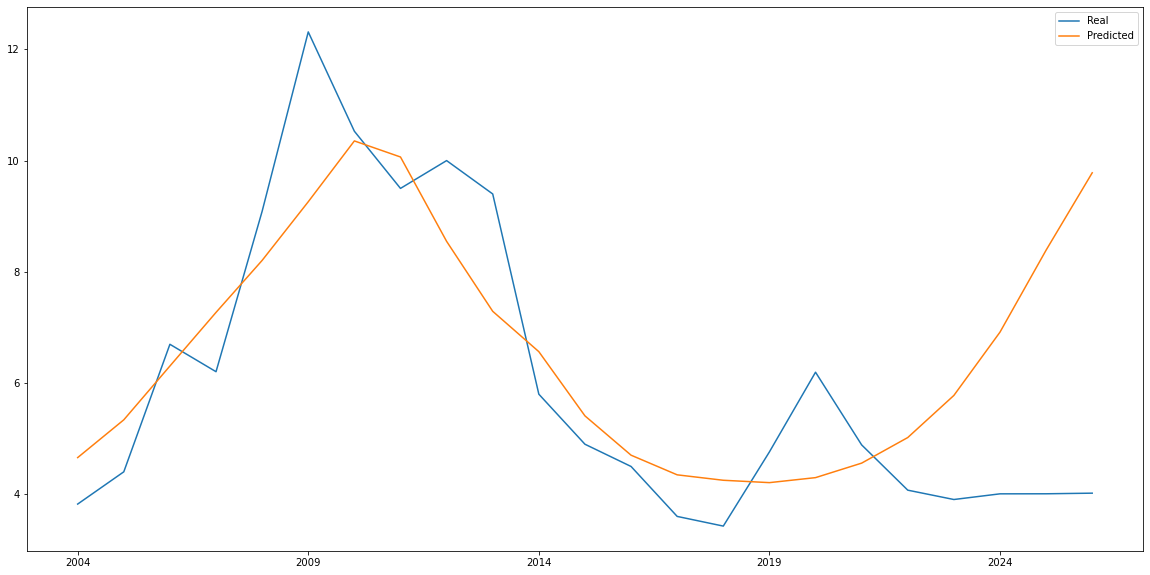

In [37]:
# Plot the real vs predicted prices as a line chart
Inflation.plot(figsize=(20,10))